<a href="https://colab.research.google.com/github/Jucicarla/analise-de-sentimento/blob/main/Trabalho.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Análise de Sentimentos usando TextBlob: Analisar comentários postados por usuários sobre restaurantes.**

**Introdução**

Os comentários dos usuários são uma parte significativa da imagem organizacional, os usuários estão cada vez mais compartilhando suas experiências boas ou ruins, assim como consultam outras experiências semelhantes de outros usuários.

Esse trabalho consiste na análise de sentimentos de comentários coletados da web, tendo como base de dados 100.000 comentários relacionados a opiniões de restaurantes pelo Brasil do site TripAdvisor. 


1.   TextBlob: é uma biblioteca de software livre para processar dados textuais, fornecendo uma API simples para NLP.
2.   Análise de Sentimento:

    *   Polaridade: representa o grau de positividade ou negatividade de um texto (positivo, negativo e neutro)
    *   Sentenças: Subjetiva(é o que se quer analisar) e Objetiva(factuais)















#**Instalação do pacote googletrans** 

In [1]:
!pip install googletrans

# **Instalação do pacote TextBlob**

In [2]:
!python -m textblob.download_corpora

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
Finished.


# **Importação de Bibliotecas**

In [10]:
import numpy as np
import matplotlib as mat
import matplotlib.pyplot as plt
from textblob import TextBlob
import pandas as pd
from googletrans import Translator
import time
import json
# montar o Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#1 - **Preparação e exploração dos dados**


*   Coleta
*   Preparação e Limpeza dos dados
*   Análise Exploratória de Dados





## 1.1 — Coleta de dados: a fonte de dados já foi selecionada pelo professor e disponibilizado no endereço: http://tiagodemelo.info/datasets/dataset-v2.dat

In [11]:
arquivo = '/content/drive/MyDrive/dataset-v2.dat'
d = []
with open(arquivo) as infile:
  for line in infile:
    try:
      item = json.loads(line.strip())
      d.append(item)
    except:
      None

**Criação do DataFrame com os 100.000 mil comentários.**

In [12]:
#criou um DataFrame a partir de um dataset
df = pd.DataFrame(d)

In [13]:
df

,title,reviewId,restaurantId,author,reviewBody,language,mobileDevice,userLocation,publicationDate,visitDate,ratingValue,itemReviewed
0,Jantar,692856288,2344932,larinhavercosa222,"Comida maravilhosa, lugar do verdadeiro chicle...",pt,True,"São Carlos, SP",26/07/2019,07/2019,5,"{'name': 'Imperador dos Camarões', 'address': ..."
1,Uma boa experiência.,229208487,3720906,Pano P,"Comida boa, drinks legais e um ambiente bem ac...",pt,True,"Manaus, AM",16/09/2014,None,4,"{'name': 'Guacamole Natal', 'address': {'stree..."
2,Otimo self service,679002332,2248105,Magma100,"Excelente pra ir com a família! Ótima Comida, ...",pt,True,"Goiânia, GO",04/06/2019,07/2018,4,"{'name': 'Chica Pitanga', 'address': {'streetA..."
3,O sorvete mais tradicional do estado,355671519,8168302,Yurie M,Tomo sorvete na Visabor faz mais de 30 anos. S...,pt,False,"Aracaju, SE",15/03/2016,01/2016,5,"{'name': 'Sorvetes Vi Sabor', 'address': {'str..."
4,Melhor hamburger!,268741921,5395141,Debora_C85,O melhor hamburger que já comi! Excelente aten...,pt,False,"Rio de Janeiro, RJ",28/04/2015,04/2015,5,"{'name': 'Z Deli Sandwich Shop', 'address': {'..."
...,...,...,...,...,...,...,...,...,...,...,...,...
99995,Nova opção no Paseo!!!,672210394,17424548,Fabiano B,"Ainda não inaugurado oficialmente, está atende...",pt,True,"Porto Alegre, RS",07/05/2019,05/2019,5,"{'name': 'Boteco Maestro', 'address': {'street..."
99996,Bom,380904400,2440184,Chris L,"Bom atendimento, lugar bonito, comida muito go...",pt,True,"Cork, Irlanda",08/06/2016,01/2016,4,"{'name': 'Casa do Marquês', 'address': {'stree..."
99997,Bom bar,186111858,2392996,Guilherme P,O Rio Scenarium é uma das baladas mais famosas...,pt,False,"São Paulo, SP",27/11/2013,11/2013,4,"{'name': 'Rio Scenarium', 'address': {'streetA..."
99998,Me senti enganada...,152745909,1062290,LisianeCohem,"Fui por indicação e com boa expectativa!\n116,...",pt,True,"Porto Alegre, RS",21/02/2013,None,2,"{'name': 'Celeiro', 'address': {'streetAddress..."


**Armazenar os 200 comentários para análise**

In [15]:
dataset = pd.read_json('/content/drive/MyDrive/dataset-v2.dat',lines=True)
dataset_200_line = dataset.sample(200)

In [16]:
dataset_200_line

,title,reviewId,restaurantId,author,reviewBody,language,mobileDevice,userLocation,publicationDate,visitDate,ratingValue,itemReviewed
76258,Pode melhorar,501201253,4087141.0,Carlos N,Apesar de amar Maceio é sempre está por aqui a...,pt,True,Macei,12/07/2017,06/2017,3,"{'name': 'Basilico Ristorante Italiano', 'addr..."
84136,Muito bom!!,444844680,8664143.0,jordanad460,"Lugar pequeno, mas super agradavel. Ótimo aten...",pt,True,"Campo Grande, MS",17/12/2016,12/2016,5,"{'name': 'Ernesto café/bar', 'address': {'stre..."
96926,Ambiente muito bonito,236640106,2366039.0,agonella,Uma das melhores casas de sushi de Porto Alegr...,pt,False,"Porto Alegre, RS",27/10/2014,11/2013,4,"{'name': 'Takêdo', 'address': {'streetAddress'..."
40463,Hambúrguer show de bola,416296433,10148124.0,1980guilherme,O hambúrguer e maravilhoso muito bom mesmo. Te...,pt,True,"São Paulo, SP",08/09/2016,09/2016,5,"{'name': 'Nossa Carne', 'address': {'streetAdd..."
1728,Massa,325354402,2352973.0,Isabelle A,Bom restaurante especializado em boas massas a...,pt,False,"Natal, RN",08/11/2015,05/2015,3,"{'name': 'Mamma Rosa', 'address': {'streetAddr..."
...,...,...,...,...,...,...,...,...,...,...,...,...
43795,Muito bom,256090632,1200314.0,Mirellasb,Muito bom. Uma localização maravilhosa. De fre...,pt,True,"São Paulo, SP",23/02/2015,None,4,"{'name': 'Amado', 'address': {'streetAddress':..."
90263,Pizzaria,281180886,1097487.0,leleka03,"Excelente pizza, com uma grande variedade de s...",pt,False,"Fortaleza, CE",18/06/2015,06/2015,5,"{'name': 'Vila Mosquito', 'address': {'streetA..."
49226,simples mas saboroso,367268852,4086297.0,DeiaLewis,"Local simples, poucas opções no rodízio, mas p...",pt,False,"Porto Alegre, RS",25/04/2016,04/2016,4,"{'name': 'Churrascaria Giovanaz', 'address': {..."
20164,Ótimo restaurante....,380404639,2344932.0,crishichi,"Um restaurante muito bom, com pratos muito sab...",pt,True,"Maceió, AL",06/06/2016,06/2016,5,"{'name': 'Imperador dos Camarões', 'address': ..."


##**1.2 Preparação e Limpeza dos dados**
Hora de normalizar os dados, aplicar um padrão único de entrada.

Descompactar a coluna itemReviewed, para normalizar.

In [32]:
itemReviewed = pd.json_normalize(dataset_200_line['itemReviewed'])

In [34]:
itemReviewed

,name,website,email,phoneNumber,averageRating,address.streetAddress,address.addressLocality,address.addressRegion,address.postalCode,address.country
0,Basilico Ristorante Italiano,http://basilicomaceio.thefork.rest,basilico2ristorante@gmail.com,+55 82 3432-7553,4.5,"Rua Deputado Luiz Gonzaga Coutinho, 186",,Alagoas,57036-110,Brasil
1,Ernesto café/bar,http://www.facebook.com/Ernesto-caf%C3%A9bar-1...,None,+55 67 3222-4607,4.5,Rua Manoel Inacio de Souza 509 Jardim Dos Estados,,Mato Grosso do Sul,79020-220,Brasil
2,Takêdo,http://www.takedo.com.br,reservas@takedo.com.br,+55 51 3332-4170,4.5,"Rua Carvalho Monteiro, 397",Porto Alegre,Rio Grande do Sul,90470-100,Brasil
3,Nossa Carne,https://www.facebook.com/NossaCarne,None,1138954660,4.0,Rua Pinheiro Guimaraes 50 Próximo ao metro vil...,São Paulo,Estado de São Paulo,03141-030,Brasil
4,Mamma Rosa,http://www.mammarosa.com.br,None,(21) 2556-6502,3.5,"Rua das Laranjeiras, 506 Laranjeiras",Rio de Janeiro,Estado do Rio de Janeiro,22240-006,Brasil
...,...,...,...,...,...,...,...,...,...,...
195,Amado,http://www.amadobahia.com.br/,reservas@amadobahia.com.br,+557133223520,4.5,Avenida Lafayete Coutinho 660,Salvador,Bahia,40015-160,Brasil
196,Vila Mosquito,http://www.vilamosquito.com.br/,contato@vilamosquito.com.br,558532267422,4.5,"Rua Antonio Augusto, 786",Fortaleza,Ceará,60110-370,Brasil
197,Churrascaria Giovanaz,None,None,51-3227-4217,4.5,Avenida Venancio Aires 10,Porto Alegre,Rio Grande do Sul,90040-190,Brasil
198,Imperador dos Camarões,http://www.imperadordoscamaroes.com.br,contato@imperadordoscamaroes.com.br,+55 82 3231-4134,4.5,Avenida Doutor Antônio Gouveia,,Alagoas,57030-170,Brasil


União do dataset gerado pela coluna que foi tratada com o dataset inicial que contém todos os dados.

In [33]:
dataset_full = pd.DataFrame.join(dataset_200_line, itemReviewed)

Remoção da coluna que contém os dados não tratados.

In [ ]:
dataset_full.drop(columns=['itemReviewed'])

,title,reviewId,restaurantId,author,reviewBody,language,mobileDevice,userLocation,publicationDate,visitDate,ratingValue,name,website,email,phoneNumber,averageRating,address.streetAddress,address.addressLocality,address.addressRegion,address.postalCode,address.country
98166,Muito bom,207083248,5390058.0,José Luiz C,"Ambiente muito agradável, comida boa, chopp da...",pt,False,"Belém, PA",26/05/2014,02/2014,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
94973,"Se você conseguir entrar, certamente ficará sa...",559097428,8723825.0,rodrigomD9272UG,O grande aspecto negativo é a imensa fila de e...,pt,False,"São Paulo, SP",07/02/2018,06/2017,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31899,Uma nova surpresa agradável na cozinha regional,609716012,15047192.0,None,A localização é a de um restaurante tradiciona...,en,False,"São Paulo, SP",23/08/2018,08/2018,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24753,Sensacional!!!!!!,667308653,17039699.0,danilopaixao,"Lugar descolado, boa música, comida excelente!...",pt,True,"Fortaleza, CE",18/04/2019,04/2019,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44599,"Comida, bebida e música de qualidade!",382442296,3703758.0,carolbmr,"O cardápio do Paprika é bem diversificado, a c...",pt,False,"São Paulo, SP",14/06/2016,06/2016,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67498,Comida boa,169901462,3834195.0,rondibenicio,"É bom, pois não é muito caro. Geralmente as co...",pt,False,"Palmas, TO",30/07/2013,08/2012,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45449,"Piú shopping Iguatemi - grosseria, desrespeito...",638428234,5341770.0,jumarroni,Estive hoje no restaurante novo que abriram no...,pt,True,"São Paulo, SP",09/12/2018,12/2018,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66142,Maravilhoso,426787036,1057625.0,688vanian,Picanha fantastica! Couvert excelente! Preço n...,pt,True,"Porto Seguro, BA",10/10/2016,10/2016,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
72528,Comida saborosa,357784682,2345463.0,BRFO,O Restaurante Camarões Potiguar é uma boa opçã...,pt,False,"Parnamirim, RN",23/03/2016,07/2015,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 1.3 - Análise Exploratória de Dados

É aqui onde exploramos nossos dados, após serem limpos, aplicando uma infinidade de técnicas para entendê-los.

Na exploração de dados também aplicamos também várias técnicas de visualização, plotando nossas variáveis através de gráficos, cada qual para um tipo correspondente de variável.

Dataset final a ser trabalhado.

In [ ]:
dataset_full

,title,reviewId,restaurantId,author,reviewBody,language,mobileDevice,userLocation,publicationDate,visitDate,ratingValue,itemReviewed,name,website,email,phoneNumber,averageRating,address.streetAddress,address.addressLocality,address.addressRegion,address.postalCode,address.country
98166,Muito bom,207083248,5390058.0,José Luiz C,"Ambiente muito agradável, comida boa, chopp da...",pt,False,"Belém, PA",26/05/2014,02/2014,5,"{'name': 'Bistro & Boteco', 'address': {'stree...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
94973,"Se você conseguir entrar, certamente ficará sa...",559097428,8723825.0,rodrigomD9272UG,O grande aspecto negativo é a imensa fila de e...,pt,False,"São Paulo, SP",07/02/2018,06/2017,5,"{'name': 'A Casa do Porco', 'address': {'stree...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31899,Uma nova surpresa agradável na cozinha regional,609716012,15047192.0,None,A localização é a de um restaurante tradiciona...,en,False,"São Paulo, SP",23/08/2018,08/2018,4,"{'name': 'Olho de Boto', 'address': {'streetAd...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24753,Sensacional!!!!!!,667308653,17039699.0,danilopaixao,"Lugar descolado, boa música, comida excelente!...",pt,True,"Fortaleza, CE",18/04/2019,04/2019,5,"{'name': 'Brewstone Pub', 'address': {'streetA...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44599,"Comida, bebida e música de qualidade!",382442296,3703758.0,carolbmr,"O cardápio do Paprika é bem diversificado, a c...",pt,False,"São Paulo, SP",14/06/2016,06/2016,5,"{'name': 'Paprika Restaurante e Pizzaria', 'ad...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67498,Comida boa,169901462,3834195.0,rondibenicio,"É bom, pois não é muito caro. Geralmente as co...",pt,False,"Palmas, TO",30/07/2013,08/2012,4,"{'name': 'Risotto Mix - Natal Shopping', 'addr...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45449,"Piú shopping Iguatemi - grosseria, desrespeito...",638428234,5341770.0,jumarroni,Estive hoje no restaurante novo que abriram no...,pt,True,"São Paulo, SP",09/12/2018,12/2018,1,"{'name': 'Più Restaurante', 'address': {'stree...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66142,Maravilhoso,426787036,1057625.0,688vanian,Picanha fantastica! Couvert excelente! Preço n...,pt,True,"Porto Seguro, BA",10/10/2016,10/2016,5,"{'name': 'Royal Grill', 'address': {'streetAdd...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
72528,Comida saborosa,357784682,2345463.0,BRFO,O Restaurante Camarões Potiguar é uma boa opçã...,pt,False,"Parnamirim, RN",23/03/2016,07/2015,4,"{'name': 'Camarões Potiguar', 'address': {'str...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#**2 - Visão Geral dos DADOS**

##**Histograma**

Histogramas são úteis para visualizar a distribuição de uma série de valores

**Será que existe diferença de tamanho (caracteres) do comentário?**

In [41]:
#Criando uma coluna que contemplará a quantidade de caracteres de cada comentários
dataset_full['Tamanho_texto'] = dataset_full['reviewBody'].apply(len)

In [42]:
dataset_full['Tamanho_texto']

76258    216
84136    228
96926    311
40463    243
1728     156
        ... 
43795    124
90263    239
49226    490
20164    285
42421    113
Name: Tamanho_texto, Length: 200, dtype: int64

**Histograma, abaixo, mostra apenas que há comentários mais longos que os demais.**

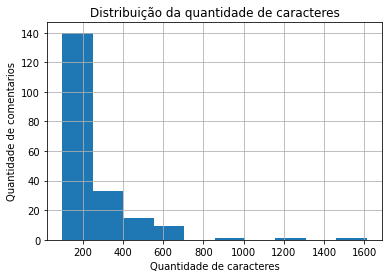

In [57]:
dataset_full.Tamanho_texto.hist()
plt.xlabel("Quantidade de caracteres")
plt.ylabel("Quantidade de comentarios")
plt.title("Distribuição da quantidade de caracteres")
plt.show()

## Qual a distribuição das estrelas dos participantes da pesquisa?
## A maioria dos participantes deram conceitos na  faixa entre 3 a 5 estrelas, sendo 5 a mais frequente.

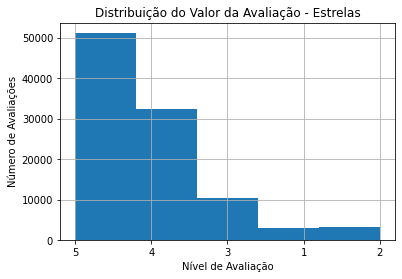

In [35]:
df.ratingValue.hist(bins = 5)
plt.xlabel("Nível de Avaliação")
plt.ylabel("Número de Avaliações")
plt.title("Distribuição do Valor da Avaliação - Estrelas")
plt.show()

##**3- Análise de Sentimentos**


Visa identificar o sentimento apresentado a respeito de alguma entidade e traduzir as incertezas da emoção. 

* Objetivo da análise de sentimento

  * Analisar produtos, marcas, empresas de outros
  * Identificar, interpretar e recomendar ações baseadas em sinais de mercado
  * ajudar os usuários na tomada de decisão








Seleção das 200 sentenças de treino.

In [58]:
gabarito_us = []
for key,line in dataset_200_line.iterrows():
  line_pt = TextBlob(line['reviewBody'])
  line_us = line_pt.translate(to='us')
  gabarito_us.append(line_us)

Gabarito traduzido com Textblob

In [ ]:
gabarito_us

[TextBlob("Very pleasant atmosphere, good food, cold Brahma draft beer. The price is a little steep, but in the end, it is worth it!"),
 TextBlob("The big negative is the long queue at almost every hour. It is not possible to go without planning. And you have to leave the name on the queue at the location.
 
 Despite this, it is a unique gastronomic experience. From starters to desserts. Everything is incredible."),
 TextBlob("The location is that of a traditional restaurant that closed a few months ago, in a classic house from the early 20th century. In a city that recently became UNESCO's "City of Gastronomy", but where true local cuisine can be counted on the fingers of one hand, Olho de Boto is a pleasant surprise. It offers a little bit of the Belle Epoque flavor, when Bel m's cuisine fused the local indigenous base with African and hibiscus influences and works with good quality ingredients. It also works with a barbecue for local fish. It's worth visiting."),
 TextBlob("Cool pla

Gabarito traduzido com googletrans e depois aplicado textbloob

In [ ]:
gabarito_us_gtrans = []
translator = Translator()
for key, line in dataset_200_line.iterrows():
  try:
    line_us = translator.translate(line['reviewBody'],dest='en').text
    line_us_tb = TextBlob(line_us)
    gabarito_us_gtrans.append(line_us_tb)

  except:
    line_us_tb = TextBlob('NaN')
    gabarito_us_gtrans.append(line_us_tb)

**Análise de sentimento com TextBlob**

In [ ]:
for i in gabarito_us_gtrans:
  print(i.raw, i.sentiment.polarity, i.sentiment.subjectivity)

Very pleasant atmosphere, good food, cold Brahma draft beer. The price is a little steep, but in the end, it is worth it! 0.24816666666666665 0.64
The big negative is the long queue at almost every hour. It is not possible to go without planning. And you have to leave the name on the queue at the location.

Despite this, it is a unique gastronomic experience. From starters to desserts. Everything is incredible. 0.15416666666666667 0.6333333333333333
The location is that of a traditional restaurant that closed a few months ago, in a classic house from the early 20th century. In a city that recently became UNESCO's "City of Gastronomy", but where true local cuisine can be counted on the fingers of one hand, Olho de Boto is a pleasant surprise. It offers a little bit of the Belle Epoque flavor, when Bel m's cuisine fused the local indigenous base with African and hibiscus influences and works with good quality ingredients. It also works with a barbecue for local fish. It's worth visiting.

In [59]:
len(gabarito_us)

200

Gerar CSV do resultado direto do Textblob
  Primeiro adiciona todas informações uteis(3 colunas em um dict)

In [60]:
dict_tb = {}
for key, i in zip(range(len(gabarito_us)),gabarito_us):
  dict_tb[key] = {'texto': i.raw,'polaridade': i.sentiment.polarity, 'subjetividade': i.sentiment.subjectivity}

In [61]:
dict_tb

{0: {'polaridade': -0.00833333333333334,
  'subjetividade': 0.7083333333333334,
  'texto': 'Despite loving Maceio is always here for work, I am always disappointed with the services we provide in that city. This restaurant was no different. Good food, cozy place, but with poor service.'},
 1: {'polaridade': 0.41296296296296303,
  'subjetividade': 0.664814814814815,
  'texto': 'Small place, but super nice. Great service. Lean lunch menu but with good options in a gourmet proposal. We ate a very tasty carter (I would only take the touch of cinnamon) and the price was super good !! I recommend!!'},
 2: {'polaridade': 0.37592592592592594,
  'subjetividade': 0.6259259259259259,
  'texto': 'One of the best sushi houses in Porto Alegre. The atmosphere is very romantic. Well located and with easy access. Great service, modern, elegant and cozy atmosphere, full buffet. It would give a maximum score if the sushi was fresher, the buffet is self service, so some sushi stops being fresh.'},
 3: {'p

In [ ]:
df_tb = pd.DataFrame.from_dict(dict_tb, orient='index')
df_tb.to_csv('/content/drive/MyDrive/Trabalho/df_tb.csv', encoding='utf-8')

Gerar CSV do resulto do Textblob com apoio do google trans.

In [ ]:
dict_trans_tb = {}
for key, i in zip(range(len(gabarito_us_gtrans)),gabarito_us_gtrans):
  dict_trans_tb[key] = {'texto': i.raw,'polaridade': i.sentiment.polarity, 'subjetividade': i.sentiment.subjectivity}

In [ ]:
df_trans_tb = pd.DataFrame.from_dict(dict_trans_tb, orient='index')
df_trans_tb.to_csv('/content/drive/MyDrive/Trabalho/df_trans_tb.csv', encoding='utf-8')

#**4 - Visão Temporal**

#**5- Visão Geográfica**

